In [1]:
import tensorflow
import matplotlib
import seaborn 
import numpy 
import pandas
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.6.0
3.4.3
0.11.2
1.21.4
1.3.3
1.0


## 모든 단어로 단어사전 만들기

In [2]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
print("훈련 샘플의 수:{}".format(len(x_train)))
print("테스트 샘플의 수:{}".format(len(x_test)))

훈련 샘플의 수:8982
테스트 샘플의 수:2246


In [5]:
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

In [6]:
print(y_train[0])
print(y_test[0])

3
3


In [7]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이: 2376
훈련용 뉴스의 평균 길이: 145.5398574927633


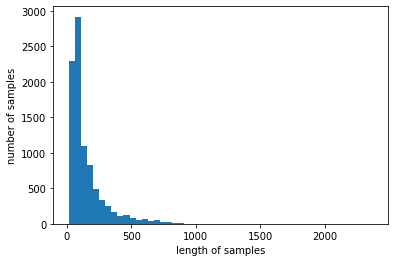

In [8]:
# 훈련용 데이터의 최대 길이 및 평균 길이
print("훈련용 뉴스의 최대 길이: {}".format(max(len(l) for l in x_train)))
print("훈련용 뉴스의 평균 길이: {}".format(sum(map(len, x_train))/len(x_train)))
      
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

<AxesSubplot:ylabel='count'>

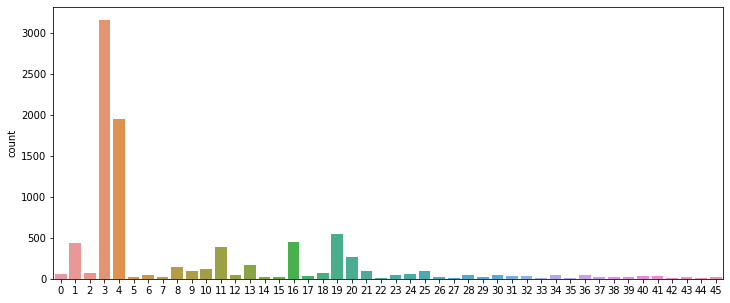

In [9]:
# 클래스의 분포 보기
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.countplot(y_train)

In [10]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [11]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

565248/550378 [==============================] - 0s 0us/step


In [12]:
print(word_index['the'])
print(word_index['if'])

1
104


In [13]:
index_to_word = {index+3 : word for word, index in word_index.items()}

In [14]:
print(index_to_word[4])
print(index_to_word[104])

the
february


사실 { 0 : `<pad>` , 1 : `<sos>`, 2 : `<unk>` } 토큰을 나타나기 때문에  <br>
    'the'는 1번이 아니라 4번 단어이다.

In [15]:
# 문제 1: 로이터 뉴스 데이터의 단어장을 만들고,
# 훈련 데이터와 테스트 데이터로부터 DTM, TF-IDF 행렬을 생성해주세요.

# 데이터의 단어장
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = {index+3 : word for word, index in word_index.items()}

# <pad>:0, <sos>:1, <unk>:2 토큰 넣어주기
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

# 훈련 데이터 변환
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)
    
x_train = decoded
print(len(x_train))

# 테스트 데이터 변환
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)
    
x_test = decoded
print(len(x_test))

# DTM 만들기
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm = dtmvector.transform(x_test)
print(x_train_dtm.shape)
print(x_test_dtm.shape)

# TF-IDF 행렬 만들기
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

# 평가 데이터를 TF-IDF로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm)
print(tfidfv_test.shape)

8982
2246
(8982, 26506)
(2246, 26506)
(8982, 26506)
(2246, 26506)


In [16]:
# 모델 및 평가 지표 라이브러리 import 
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [17]:
# 문제 2: TF-IDF로 표현된 데이터에 위의 머신러닝 모델들을 적용하고,
# 모델의 정확도와 f1 score를 각각 출력하는 함수 models_accuracy를 구현해주세요.

model = MultinomialNB()
def models_accuracy(tfidfv, tfidfv_test, y_train, y_test):
    model.fit(tfidfv, y_train)
    predicted = model.predict(tfidfv_test)
    print("정확도:", accuracy_score(y_test, predicted))
    print("f1_score:", f1_score(y_test, predicted, average=None))

In [19]:
# 성능 비교
models_accuracy(tfidfv, tfidfv_test, y_train, y_test)

정확도: 0.5997328584149599
f1_score: [0.         0.33082707 0.         0.81189189 0.60869565 0.
 0.         0.         0.         0.         0.         0.42477876
 0.         0.         0.         0.         0.29268293 0.
 0.         0.64435146 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [20]:
print(x_test[3])
print(y_test[3])

<sos> graham mccormick oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north rucias fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to prepay principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the noteholders exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3
4


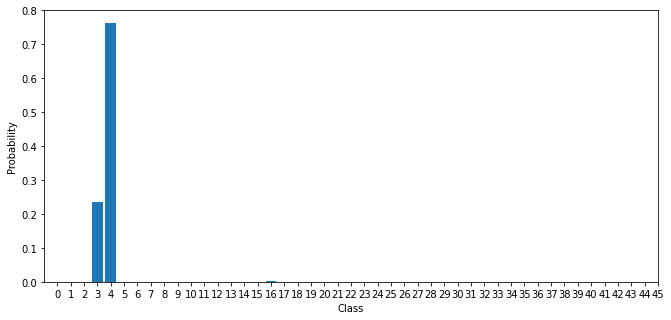

array([4])

In [21]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()
model.predict(tfidfv_test[3])

## 빈도수 상위 5,000자를 사용해 Vocabulary 만들기

In [22]:
# 데이터 불러오기
(x_train1, y_train1), (x_test1, y_test1) = reuters.load_data(num_words=5000, test_split=0.2)

In [23]:
# 데이터의 단어장
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = {index+3 : word for word, index in word_index.items()}

# <pad>:0, <sos>:1, <unk>:2 토큰 넣어주기
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [24]:
# 훈련 데이터 변환
decoded1 = []
for i in range(len(x_train1)):
    t = ' '.join([index_to_word[index] for index in x_train1[i]])
    decoded1.append(t)
    
x_train1 = decoded1
print(len(x_train1))

# 테스트 데이터 변환
decoded1 = []
for i in range(len(x_test1)):
    t = ' '.join([index_to_word[index] for index in x_test1[i]])
    decoded1.append(t)
    
x_test1 = decoded1
print(len(x_test1))

8982
2246


In [25]:
# DTM 만들기
dtmvector = CountVectorizer()
x_train1_dtm = dtmvector.fit_transform(x_train1)
x_test1_dtm = dtmvector.transform(x_test1)
print(x_train1_dtm.shape)
print(x_test1_dtm.shape)

# TF-IDF 행렬 만들기
tfidf_transformer = TfidfTransformer()
tfidfv1 = tfidf_transformer.fit_transform(x_train1_dtm)
print(tfidfv1.shape)

# 평가 데이터를 TF-IDF로 변환
tfidfv_test1 =  tfidf_transformer.transform(x_test1_dtm)
print(tfidfv_test1.shape)

(8982, 4867)
(2246, 4867)
(8982, 4867)
(2246, 4867)


In [26]:
# 성능 비교
models_accuracy(tfidfv1, tfidfv_test1, y_train1, y_test1)

정확도: 0.6731967943009796
f1_score: [0.         0.61764706 0.         0.87061669 0.72859451 0.
 0.         0.         0.         0.4375     0.         0.57819905
 0.         0.23809524 0.         0.         0.625      0.
 0.         0.62608696 0.225      0.         0.         0.
 0.         0.12121212 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


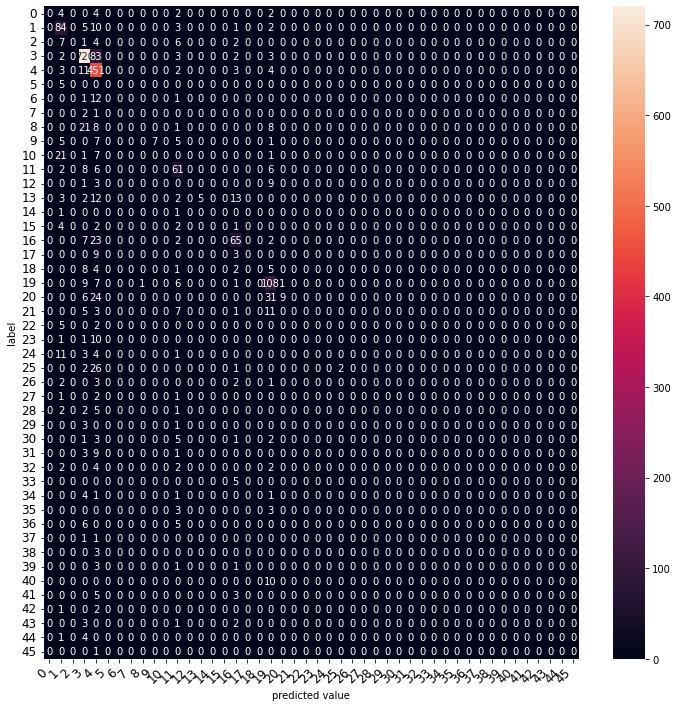

In [27]:
# confusion matrix 시각화
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(12,12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')
    
graph_confusion_matrix(model, tfidfv_test1, y_test1)

## 머신러닝 모델 사용

In [28]:
# Complement Naive Bayes Classifier(CNB)
cb = ComplementNB()
cb.fit(tfidfv1, y_train1)
predicted = cb.predict(tfidfv_test1) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test1, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


In [29]:
# 로지스틱 회귀(Logistic Regression)
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv1, y_train1)
predicted = lr.predict(tfidfv_test1) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test1, predicted)) #예측값과 실제값 비교

정확도: 0.8036509349955476


In [30]:
# 선형 서포트 벡터 머신(Linear Support Vector Machine)
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv1, y_train1)
predicted = lsvc.predict(tfidfv_test1) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test1, predicted)) #예측값과 실제값 비교

정확도: 0.7729296527159395


In [31]:
# 결정 트리(Decision Tree)
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6211041852181657


In [32]:
# 랜덤 포레스트(Random Forest)
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6544968833481746


## 딥러닝 모델 사용

In [49]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [50]:
# 데이터 불러오기
# 최적의 모델과 단어 수 조건은 사람마다 다르므로 여기서는 5,000개로 설정하겠습니다. 
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)
print(len(x_train), len(x_test))

8982 2246


훈련용 뉴스의 최대 길이: 2376
훈련용 뉴스의 평균 길이: 145.5398574927633


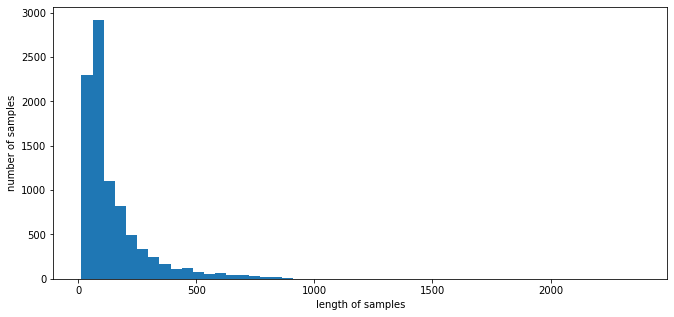

In [51]:
# 훈련용 데이터 최대 길이 및 평균 길이 살펴보기
print("훈련용 뉴스의 최대 길이: {}".format(max(len(l) for l in x_train)))
print("훈련용 뉴스의 평균 길이: {}".format(sum(map(len, x_train))/len(x_train)))
      
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

테스트용 뉴스의 최대 길이: 1032
테스트용 뉴스의 평균 길이: 147.66117542297417


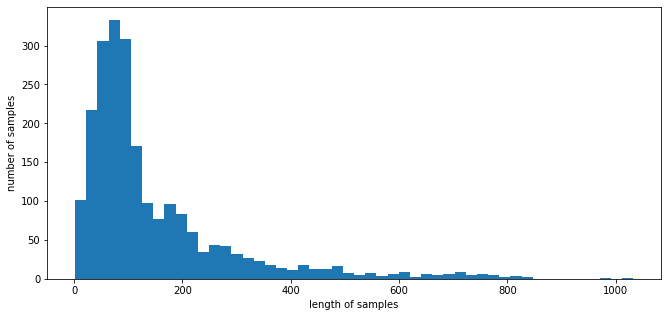

In [52]:
# 테스트 데이터 최대 길이 및 평균 길이 살펴보기
print("테스트용 뉴스의 최대 길이: {}".format(max(len(l) for l in x_test)))
print("테스트용 뉴스의 평균 길이: {}".format(sum(map(len, x_test))/len(x_test)))
      
plt.hist([len(s) for s in x_test], bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

In [53]:
# keras.preprocessing.sequence.pad_sequences()를 사용하여 패딩
maxlen = 100

x_train = keras.preprocessing.sequence.pad_sequences(x_train, padding='pre', maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, padding='pre', maxlen=maxlen)

In [54]:
# to_categorical()을 사용하여 레이블에 원-핫인코딩을 해보세요. 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [63]:
# http://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221226716255 참고

from tensorflow.keras import backend as K
def recall(y_target, y_pred):
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) 
    y_target_yn = K.round(K.clip(y_target, 0, 1))

    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [60]:
# 문제 3: 로이터 뉴스 데이터셋을 위한 LSTM 모델을 구현해주세요.

# 어휘 사전 크기 
vocab_size = 10000
# 워드 벡터의 차원수 
word_vector_dim = 100


#RNN 모델 설계
embedding_dim = 128
hidden_units = 128
num_classes = 46

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
#mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
# compile
model.compile(loss='categorical_crossentropy', optimizer='adam')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 46)                5934      
Total params: 1,417,518
Trainable params: 1,417,518
Non-trainable params: 0
_________________________________________________________________


In [61]:
# fit
history = model.fit(x_train, y_train, batch_size=128, epochs=30, callbacks=[es], validation_split=0.2)

Epoch 1/30
57/57 [==============================] - 2s 17ms/step - loss: 2.7017 - val_loss: 2.3821
Epoch 2/30
57/57 [==============================] - 1s 9ms/step - loss: 2.1974 - val_loss: 2.1152
Epoch 3/30
57/57 [==============================] - 1s 9ms/step - loss: 2.0017 - val_loss: 1.9442
Epoch 4/30
57/57 [==============================] - 1s 9ms/step - loss: 1.8226 - val_loss: 1.8875
Epoch 5/30
57/57 [==============================] - 1s 9ms/step - loss: 1.7315 - val_loss: 1.7701
Epoch 6/30
57/57 [==============================] - 1s 9ms/step - loss: 1.6440 - val_loss: 1.6708
Epoch 7/30
57/57 [==============================] - 1s 9ms/step - loss: 1.5186 - val_loss: 1.5965
Epoch 8/30
57/57 [==============================] - 1s 9ms/step - loss: 1.3963 - val_loss: 1.5392
Epoch 9/30
57/57 [==============================] - 1s 9ms/step - loss: 1.2917 - val_loss: 1.4867
Epoch 10/30
57/57 [==============================] - 1s 9ms/step - loss: 1.2068 - val_loss: 1.4653
Epoch 11/30
57/57 

In [64]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print('accuracy:', accuracy)
print('f1_score:', f1_score)

TypeError: cannot unpack non-iterable float object